#### training with linear regression.

Model evaluation for linear regression
Mean Squared Error: 11789818242485.184
Mean Absolute Error: 2164795.4652471696
Test Score: 0.8254639491291522
Train Score: 0.8404351949151277
Cross Validation Score: [0.81264681 0.85273053 0.82558359 0.77188151 0.78528818]
Mean of Cross Validation Score: 0.8096261238194872


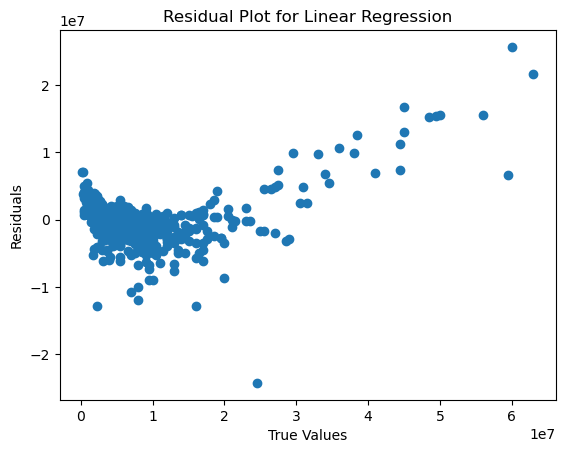

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


data = pd.read_csv('../data/processed/dataset.csv')
features = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']


# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate model
print("Model evaluation for linear regression")

mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error: {mae}")

test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")

train_score = model.score(X_train, y_train)
print(f"Train Score: {train_score}")

cv_score = cross_val_score(model, X_val, y_val, cv=5)
print(f"Cross Validation Score: {cv_score}")
print(f"Mean of Cross Validation Score: {cv_score.mean()}")

# Residual plot
plt.scatter(y_test, y_test - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()



Trong biểu đồ này, các điểm dữ liệu phân bố chủ yếu trong khoảng từ -1 đến 1 trên trục tung, với một hình dạng cong xuất hiện dưới đường thẳng y = 0 khi giá trị thực tế tăng. Điều này cho thấy rằng với các giá trị thực tế lớn hơn, dự đoán của mô hình hồi quy tuyến tính thường thấp hơn so với giá trị thực tế. 
Tuy nhiên, trong trường hợp này, hình dạng cong của các điểm dữ liệu có thể cho thấy một số vấn đề với mô hình, như:

Heteroscedasticity: Điều này xảy ra khi phương sai của sai số không đồng nhất trên toàn bộ phạm vi của biến độc lập. Trong trường hợp này, phương sai của sai số có thể tăng khi giá trị thực tế tăng.
Mô hình không tuyến tính: Nếu dữ liệu thực sự tuân theo một mô hình không tuyến tính, một mô hình hồi quy tuyến tính sẽ không thể nắm bắt được mối quan hệ giữa các biến một cách chính xác.
Để khắc phục những vấn đề này, có thể thử sử dụng một mô hình hồi quy không tuyến tính hoặc thực hiện một số biến đổi trên dữ liệu (như log transformation)

Train MSE: 10349352703372.982, Validation MSE: 15870702700242.656, Test MSE: 8969090079824.486
Train R2: 0.8481491934553842, Validation R2: 0.8143561566191013, Test R2: 0.8284926701885515


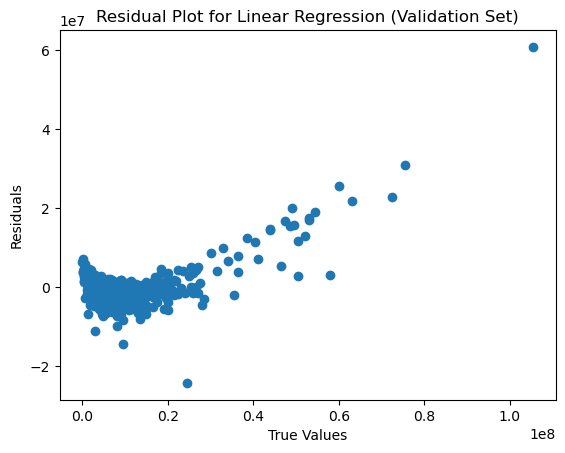

Checking for overfitting/underfitting:
Train vs Validation MSE: 10349352703372.982 vs 15870702700242.656
Train vs Validation R2: 0.8481491934553842 vs 0.8143561566191013


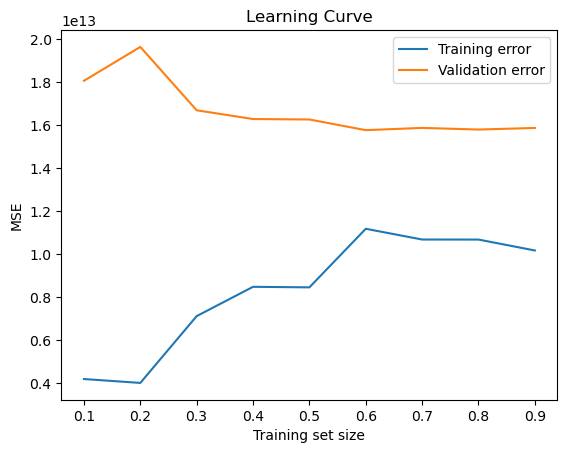

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('../data/processed/dataset.csv')
feature = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']

X = data[feature]
y = data[target]
# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")
print(f"Train R2: {train_r2}, Validation R2: {val_r2}, Test R2: {test_r2}")

# Residual plot for validation set
plt.scatter(y_val, y_val - y_val_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression (Validation Set)')
plt.show()

# Check for overfitting/underfitting
print("Checking for overfitting/underfitting:")
print("Train vs Validation MSE:", train_mse, "vs", val_mse)
print("Train vs Validation R2:", train_r2, "vs", val_r2)


#### optimization for linear regression.

Linear Regression - Mean Squared Error: 11699441554136.818
Linear Regression - R2 Score: 0.8268018824162208


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - Mean Squared Error: 936629600968.0707
Random Forest - R2 Score: 0.98613416862589


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/ensemble/_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble Model - Mean Squared Error: 4018881385863.022
Ensemble Model - R2 Score: 0.9405046225836443


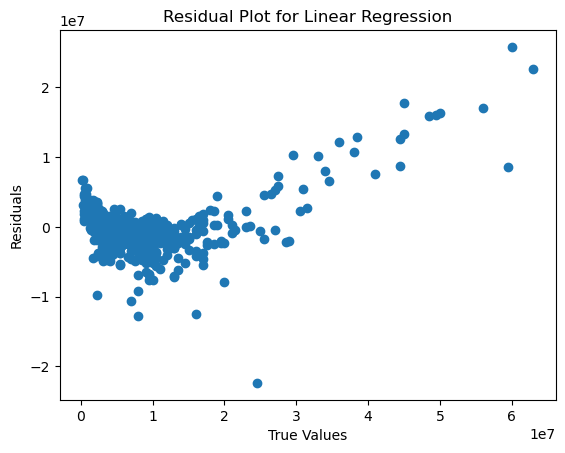

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

X = data[feature]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_val_rfe = rfe.transform(X_val_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

# Huấn luyện mô hình Ensemble (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[
    ('lr', lr_model),
    ('rf', rf_model)
])
ensemble_model.fit(X_train_scaled, y_train)
ensemble_y_pred = ensemble_model.predict(X_test_scaled)

# Đánh giá mô hình Ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_y_pred)
r2_ensemble = r2_score(y_test, ensemble_y_pred)
print(f"Ensemble Model - Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model - R2 Score: {r2_ensemble}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()



#### PolynomialFeatures for regression

Linear Regression - Mean Squared Error: 63966301811901.5
Linear Regression - R2 Score: 0.053045137979269685
Ridge Regression - Mean Squared Error: 63944655017678.75
Ridge Regression - R2 Score: 0.053365596352753175
Lasso Regression - Mean Squared Error: 63891661779806.0
Lasso Regression - R2 Score: 0.054150106365625006


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+17, tolerance: 2.598e+13
  model = cd_fast.enet_coordinate_descent(


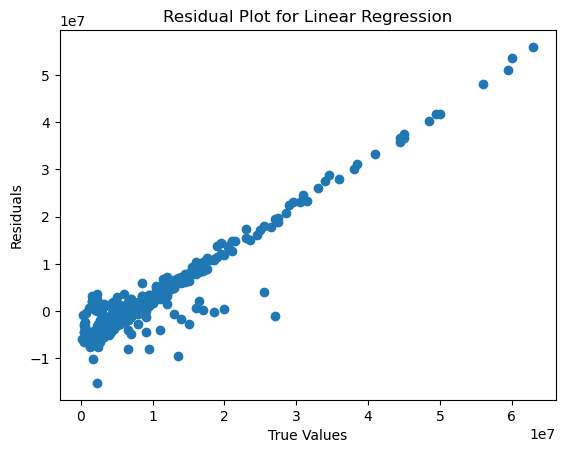

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../data/processed/dataset.csv')

feature = [
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thêm các đặc trưng đa thức
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_poly, y_train)
X_val_rfe = rfe.transform(X_val_poly)
X_test_rfe = rfe.transform(X_test_poly)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_rfe, y_train)
ridge_y_pred = ridge_model.predict(X_test_rfe)

# Đánh giá mô hình Ridge Regression
mse_ridge = mean_squared_error(y_test, ridge_y_pred)
r2_ridge = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")

# Huấn luyện mô hình Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_rfe, y_train)
lasso_y_pred = lasso_model.predict(X_test_rfe)

# Đánh giá mô hình Lasso Regression
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
r2_lasso = r2_score(y_test, lasso_y_pred)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()


Random Forest - Mean Squared Error: 936629600968.0707
Random Forest - R2 Score: 0.98613416862589


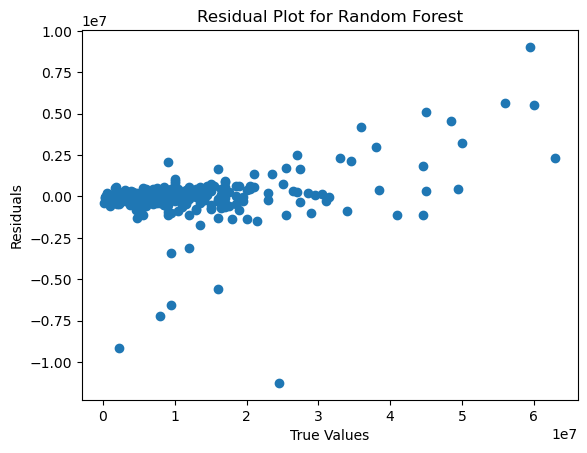

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../data/processed/dataset.csv')
# Chọn đặc trưng và target
feature = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thử nghiệm với mô hình Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Random Forest
rf_y_pred = rf_model.predict(X_test_scaled)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

# Vẽ đồ thị residual

plt.scatter(y_test.values.ravel(), y_test.values.ravel() - rf_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Random Search cho Ridge Regression
ridge_param_dist = {
    'alpha': uniform(0.1, 100),  # Uniform distribution từ 0.1 đến 100
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge_random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=ridge_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
ridge_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Ridge
print(f"Best parameters for Ridge (Random Search): {ridge_random_search.best_params_}")

# Huấn luyện mô hình Ridge với tham số tốt nhất
best_ridge_random = ridge_random_search.best_estimator_
best_ridge_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Ridge tối ưu
ridge_random_y_pred = best_ridge_random.predict(X_test_scaled)

# Đánh giá mô hình Ridge tối ưu
mse_ridge_random = mean_squared_error(y_test, ridge_random_y_pred)
r2_ridge_random = r2_score(y_test, ridge_random_y_pred)
print(f"Ridge Regression (Random Search) - Mean Squared Error: {mse_ridge_random}")
print(f"Ridge Regression (Random Search) - R2 Score: {r2_ridge_random}")

# Random Search cho Lasso Regression
lasso_param_dist = {
    'alpha': uniform(0.01, 100),  # Uniform distribution từ 0.01 đến 100
    'max_iter': [1000, 5000, 10000]
}
lasso_random_search = RandomizedSearchCV(estimator=Lasso(), param_distributions=lasso_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
lasso_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Lasso
print(f"Best parameters for Lasso (Random Search): {lasso_random_search.best_params_}")

# Huấn luyện mô hình Lasso với tham số tốt nhất
best_lasso_random = lasso_random_search.best_estimator_
best_lasso_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Lasso tối ưu
lasso_random_y_pred = best_lasso_random.predict(X_test_scaled)

# Đánh giá mô hình Lasso tối ưu
mse_lasso_random = mean_squared_error(y_test, lasso_random_y_pred)
r2_lasso_random = r2_score(y_test, lasso_random_y_pred)
print(f"Lasso Regression (Random Search) - Mean Squared Error: {mse_lasso_random}")
print(f"Lasso Regression (Random Search) - R2 Score: {r2_lasso_random}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, s

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.2s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.9s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.8s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.3s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.2s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   0.8s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.3s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.4s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.0s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.0s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   0.8s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.1s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.201e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.1s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.0s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.2s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.3s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.2s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.4s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.771e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   0.8s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   1.0s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.1s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.754e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.1s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.0s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.3s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   1.1s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.7s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   0.9s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   0.7s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   1.0s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.7s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   1.2s
[CV] END ............alpha=42.525587449124465, max_iter=5000; total time=   0.9s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   1.0s
[CV] END ..............alpha=66.2622284353982, max_iter=5000; total time=   1.1s
[CV] END ............alpha=9

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e+13, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.3s
[CV] END ............alpha=54.681027934327965, max_iter=5000; total time=   1.0s
[CV] END ............alpha=9.777211400638388, max_iter=10000; total time=   1.3s
[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.0s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.9s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   1.2s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.0s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.7s
[CV] END ............alpha=54.681027934327965, max_iter=5000; total time=   1.1s
[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.1s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.2s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   0.8s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.5s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.2s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.4s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.3s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+14, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.5s[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s

[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.3s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.2s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.3s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.1s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.4s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.063e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.731e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   0.9s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.2s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.878e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.1s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.4s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   1.0s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.2s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   1.0s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   1.1s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   0.9s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.4s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.1s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.3s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.7s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.719e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   1.0s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.3s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.5s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.2s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.499e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.590e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.8s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.4s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.3s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.4s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.9s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.0s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   0.9s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.1s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   0.8s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.2s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.2s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   1.0s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   1.1s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   1.2s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.3s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.3s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.3s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.4s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.2s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.5s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.0s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.6s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.0s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.0s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.4s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.1s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.4s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.1s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.3s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   0.8s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   0.9s
[CV] END .............alpha=62.44540481337932, max_iter=5000; total time=   0.8s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=7.7079909828792985, max_iter=10000; total time=   1.2s
[CV] END .............alpha=63.35037565104234, max_iter=5000; total time=   0.8s
[CV] END ...........alpha=7.

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=62.44540481337932, max_iter=5000; total time=   1.3s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END .............alpha=63.35037565104234, max_iter=5000; total time=   1.2s
[CV] END ............alpha=12.218795470067334, max_iter=1000; total time=   0.2s
[CV] END ............alpha=12.218795470067334, max_iter=1000; total time=   0.2s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.8s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.3s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.2s[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.2s

[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.2s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.8s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   1.1s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   0.8s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.7s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.1s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.9s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.3s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   0.8s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.1s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.4s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.0s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.1s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.2s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.7s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.1s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.4s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   0.7s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.3s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.1s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.0s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.9s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.4s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   1.1s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   1.2s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.8s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.2s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.9s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   0.9s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   0.9s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.0s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.2s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.1s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.1s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   0.9s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   0.9s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.8s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.2s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.0s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.2s
[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.2s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   0.7s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   1.0s
[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.3s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.1s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.9s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.510e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.0s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.2s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.2s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.5s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.3s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.7s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.8s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.8s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.6s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.7s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.8s
Best parameters for Lasso (R

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Random Search cho Ridge Regression
ridge_param_dist = {
    'alpha': uniform(0.1, 100),  # Uniform distribution từ 0.1 đến 100
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge_random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=ridge_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
ridge_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Ridge
print(f"Best parameters for Ridge (Random Search): {ridge_random_search.best_params_}")

# Huấn luyện mô hình Ridge với tham số tốt nhất
best_ridge_random = ridge_random_search.best_estimator_
best_ridge_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Ridge tối ưu
ridge_random_y_pred = best_ridge_random.predict(X_test_scaled)

# Đánh giá mô hình Ridge tối ưu
mse_ridge_random = mean_squared_error(y_test, ridge_random_y_pred)
r2_ridge_random = r2_score(y_test, ridge_random_y_pred)
print(f"Ridge Regression (Random Search) - Mean Squared Error: {mse_ridge_random}")
print(f"Ridge Regression (Random Search) - R2 Score: {r2_ridge_random}")

# Random Search cho Lasso Regression
lasso_param_dist = {
    'alpha': uniform(0.01, 100),  # Uniform distribution từ 0.01 đến 100
    'max_iter': [1000, 5000, 10000]
}
lasso_random_search = RandomizedSearchCV(estimator=Lasso(), param_distributions=lasso_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
lasso_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Lasso
print(f"Best parameters for Lasso (Random Search): {lasso_random_search.best_params_}")

# Huấn luyện mô hình Lasso với tham số tốt nhất
best_lasso_random = lasso_random_search.best_estimator_
best_lasso_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Lasso tối ưu
lasso_random_y_pred = best_lasso_random.predict(X_test_scaled)

# Đánh giá mô hình Lasso tối ưu
mse_lasso_random = mean_squared_error(y_test, lasso_random_y_pred)
r2_lasso_random = r2_score(y_test, lasso_random_y_pred)
print(f"Lasso Regression (Random Search) - Mean Squared Error: {mse_lasso_random}")
print(f"Lasso Regression (Random Search) - R2 Score: {r2_lasso_random}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.1s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.1s
[CV] END .................alpha=59.78501579464

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s

[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.3s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.4s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.7s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.1s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.4s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   0.8s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.1s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.5s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e+13, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.0s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.4s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.6s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   0.9s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   0.9s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.2s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   0.9s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.3s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.201e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   0.8s

[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.4s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.0s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.291e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.3s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.4s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.4s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.4s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.2s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   0.8s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   0.8s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.771e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.754e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.4s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.2s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.1s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   1.0s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   1.1s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.2s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.9s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   1.0s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   0.9s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   1.0s
[CV] END ............alpha=42.525587449124465, max_iter=5000; total time=   0.9s
[CV] END ..............alpha=66.2622284353982, max_iter=5000; total time=   1.1s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   1.1s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.6s
[CV] END ............alpha=9

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e+13, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.3s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.1s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   1.2s
[CV] END ............alpha=54.681027934327965, max_iter=5000; total time=   1.1s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.7s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.0s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   1.0s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.3s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.2s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.3s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.6s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.3s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   0.9s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.3s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.3s
[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.7s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.3s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   1.2s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.189e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.2s

[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.731e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.0s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.878e+15, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   0.7s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.2s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   0.9s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.6s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   1.2s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.4s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   0.9s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   1.0s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.2s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.2s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.3s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.2s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.9s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.719e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.7s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.2s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.2s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.9s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.4s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.0s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.6s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.2s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.2s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   0.8s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.2s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.3s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   0.9s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   1.0s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   1.0s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   1.2s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=4.

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.2s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.1s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   0.9s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.2s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.2s
[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.3s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.0s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.7s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   0.8s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.1s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.0s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.7s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.3s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.9s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.2s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.4s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.6s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   0.8s
[CV] END .............alpha=62.44540481337932, max_iter=5000; total time=   0.8s
[CV] END ...........alpha=7.7079909828792985, max_iter=10000; total time=   1.2s
[CV] END .............alpha=63.35037565104234, max_iter=5000; total time=   0.9s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   1.2s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.3s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.8s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.1s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.9s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.4s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.1s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   1.1s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   0.9s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.3s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.8s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   1.0s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.4s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.4s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.3s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.3s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   0.9s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.1s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.3s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   0.9s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.1s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.3s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.4s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.1s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.2s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   0.9s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.2s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.2s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   1.1s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.9s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   0.8s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.9s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   1.0s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   1.5s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.4s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   0.9s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.1s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.2s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.3s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.2s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   0.9s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.0s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.0s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.9s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.2s
[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.3s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.9s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   0.7s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   1.0s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.3s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.4s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.510e+15, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+16, tolerance: 1.811e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+16, tolerance: 1.822e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+16, tolerance: 1.563e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.8s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.8s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.9s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.8s
Best parameters for Lasso (R